# Jimmy 24 25 sreamlit app and analysis

In [1]:
# import libraries
import urllib.request
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
import numpy as np
#import gspread
#from df2gspread import df2gspread as d2g
#from oauth2client.service_account import ServiceAccountCredentials


In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import pandas as pd
import time

from selenium.webdriver.firefox.options import Options

options = Options()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36")
driver = webdriver.Firefox(options=options)



gameweeks = range(0, 37)  # Define the range of gameweeks you want to scrape (e.g. (1, 2) is just gw1) 
finished_gw = 26


# Function to scrape data for a given gameweek
def scrape_gameweek_data(driver, gameweek):
    url = f'https://app.draftfantasy.com/league/clziw2enm07u35uni93zf4din/matches?gameweek={gameweek}'
    driver.get(url)
    
    # Wait for the page to load (adjust time as necessary)
    time.sleep(3)
    
    # Get page source and parse with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Find the table
    table = soup.find('table')
    
    if table:
        # Extract data into a DataFrame
        headers = [header.text for header in table.find_all('th')]
        rows = []
        for row in table.find_all('tr')[1:]:
            rows.append([cell.text for cell in row.find_all('td')])
        
        df = pd.DataFrame(rows, columns=headers)
        return df
    else:
        print(f"No table found for gameweek {gameweek}")
        return pd.DataFrame()  # Return empty DataFrame if no table is found

# Main code
driver = webdriver.Firefox()

# Log in to the website (your previous login code)
# Set up Selenium WebDriver for Firefox
driver = webdriver.Firefox()

# Open the webpage
driver.get('https://app.draftfantasy.com/league/clziw2enm07u35uni93zf4din/matches?gameweek=1')

# Add login logic
try:
    # Wait for the username field
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.XPATH, '//input[@name="email"]'))
    ).send_keys('andy.uttley@gmail.com')
    
    # Wait for the password field
    WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.XPATH, '//input[@name="password"]'))
    ).send_keys('C@vendish22fpl')
    
    # Wait for and click the login button
    login_button = WebDriverWait(driver, 5).until(
        EC.element_to_be_clickable((By.XPATH, '//button[text()="Sign In"]'))
    )
    login_button.click()
    
except TimeoutException:
    print("Element not found or took too long to load.")
    driver.quit()
    exit()

# Wait for the page to load completely
time.sleep(2)



# After successful login, scrape data for multiple gameweeks

all_data = []

for gameweek in gameweeks:
    df = scrape_gameweek_data(driver, gameweek)
    if not df.empty:
        df['Gameweek'] = gameweek  # Add a column to identify the gameweek
        all_data.append(df)

# Combine all data into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Display or save the final DataFrame
(final_df)


# Close the browser
driver.quit()



In [28]:
#rename teams to people
final_df['Home'] = final_df['Home'].apply(lambda x: "John" if "Marsh" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "John" if "Marsh" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Dove" if "Dove" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Dove" if "Dove" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Nick" if "Fish" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Nick" if "Fish" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Mike" if "alls" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Mike" if "alls" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Andy" if "Ball" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Andy" if "Ball" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Tim" if "Shaw" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Tim" if "Shaw" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Sam" if "Bowl" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Sam" if "Bowl" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Mikey" if "Toney" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Mikey" if "Toney" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Matt" if "Hawk" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Matt" if "Hawk" in x else x)
final_df['Home'] = final_df['Home'].apply(lambda x: "Karl" if "Leif" in x else x)
final_df['Away'] = final_df['Away'].apply(lambda x: "Karl" if "Leif" in x else x)
final_df

,Home,vs,Away,Gameweek
0,Dove,39 - 50,Tim,1
1,Nick,49 - 41,Sam,1
2,John,40 - 47,Mikey,1
3,Mike,43 - 34,Matt,1
4,Andy,55 - 41,Karl,1
...,...,...,...,...
175,John,0 - 0,Matt,36
176,Andy,0 - 0,Nick,36
177,Dove,0 - 0,Sam,36
178,Mike,0 - 0,Tim,36


In [30]:
#split this dataframe into 2 of played and not

# Split final_df into two DataFrames
final_df_filtered = final_df[final_df['Gameweek'] <= finished_gw]
fixtures_df = final_df[final_df['Gameweek'] > finished_gw]
final_df = final_df_filtered

In [32]:
import pandas as pd

# Create a list to store the expanded rows
expanded_rows = []

# Loop through each row and add two rows for each game
for index, row in final_df.iterrows():
    # Split the score into two parts
    player_score, opponent_score = map(int, row['vs'].split(' - '))
    
    # Determine the result and table points
    if player_score > opponent_score:
        result = 'Win'
        table_points = 3
    elif player_score < opponent_score:
        result = 'Lose'
        table_points = 0
    else:
        result = 'Draw'
        table_points = 1
    
    # Append first player's data
    expanded_rows.append({
        'Player': row['Home'],
        'Opponent': row['Away'],
        'Player_Score': player_score,
        'Opponent_Score': opponent_score,
        'Result': result,
        'Table Points': table_points,
        'Gameweek': row['Gameweek']
    })
    
    # Determine the reverse result and table points for the opponent
    if result == 'Win':
        opponent_result = 'Lose'
        opponent_table_points = 0
    elif result == 'Lose':
        opponent_result = 'Win'
        opponent_table_points = 3
    else:
        opponent_result = 'Draw'
        opponent_table_points = 1
    
    # Append second player's data
    expanded_rows.append({
        'Player': row['Away'],
        'Opponent': row['Home'],
        'Player_Score': opponent_score,
        'Opponent_Score': player_score,
        'Result': opponent_result,
        'Table Points': opponent_table_points,
        'Gameweek': row['Gameweek']
    })

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Calculate the gameweek rank based on Player_Score
expanded_df['GW Rank'] = expanded_df.groupby('Gameweek')['Player_Score'].rank(ascending=False, method='min')

# Calculate luck points based on GW Rank
expanded_df['Luck Points'] = expanded_df['GW Rank'].apply(lambda rank: 3 if rank <= 4 else (1 if rank <= 6 else 0))

# Display the final DataFrame
final_df = expanded_df
final_df

,Player,Opponent,Player_Score,Opponent_Score,Result,Table Points,Gameweek,GW Rank,Luck Points
0,Dove,Tim,39,50,Lose,0,1,9.0,0
1,Tim,Dove,50,39,Win,3,1,2.0,3
2,Nick,Sam,49,41,Win,3,1,3.0,3
3,Sam,Nick,41,49,Lose,0,1,6.0,1
4,John,Mikey,40,47,Lose,0,1,8.0,0
...,...,...,...,...,...,...,...,...,...
255,Sam,Mike,42,63,Lose,0,26,5.0,1
256,Dove,Nick,41,47,Lose,0,26,6.0,1
257,Nick,Dove,47,41,Win,3,26,3.0,3
258,John,Mikey,36,40,Lose,0,26,8.0,0


In [34]:
final_df

,Player,Opponent,Player_Score,Opponent_Score,Result,Table Points,Gameweek,GW Rank,Luck Points
0,Dove,Tim,39,50,Lose,0,1,9.0,0
1,Tim,Dove,50,39,Win,3,1,2.0,3
2,Nick,Sam,49,41,Win,3,1,3.0,3
3,Sam,Nick,41,49,Lose,0,1,6.0,1
4,John,Mikey,40,47,Lose,0,1,8.0,0
...,...,...,...,...,...,...,...,...,...
255,Sam,Mike,42,63,Lose,0,26,5.0,1
256,Dove,Nick,41,47,Lose,0,26,6.0,1
257,Nick,Dove,47,41,Win,3,26,3.0,3
258,John,Mikey,36,40,Lose,0,26,8.0,0


# output the file and write it to github

In [36]:
final_df.to_csv('final_df.csv', index=False)


In [19]:
#final_df = pd.read_csv('final_df.csv')

#final_df2

### Make fixtures table

In [38]:
#remake fixtures table
# Drop the 'vs' column
fixtures_df = fixtures_df.drop(columns=['vs'])

# Create a list to store the expanded rows
expanded_rows = []

# Loop through each row and create two entries
for index, row in fixtures_df.iterrows():
    # Append the first entry (Home vs. Away)
    expanded_rows.append({
        'Player': row['Home'],
        'Opponent': row['Away'],
        'Gameweek': row['Gameweek']
    })
    
    # Append the second entry (Away vs. Home)
    expanded_rows.append({
        'Player': row['Away'],
        'Opponent': row['Home'],
        'Gameweek': row['Gameweek']
    })

# Convert the expanded rows into a new DataFrame
expanded_fixtures_df = pd.DataFrame(expanded_rows)

# Display the resulting DataFrame
fixtures = expanded_fixtures_df
fixtures

,Player,Opponent,Gameweek
0,Matt,Tim,27
1,Tim,Matt,27
2,Karl,Sam,27
3,Sam,Karl,27
4,Andy,Nick,27
...,...,...,...
95,Sam,Dove,36
96,Mike,Tim,36
97,Tim,Mike,36
98,Karl,Mikey,36


In [40]:
fixtures.to_csv('fixtures.csv', index=False)



In [42]:
import os
current_path = os.getcwd()
current_path

'/Users/andrewuttley'

# perform simulations

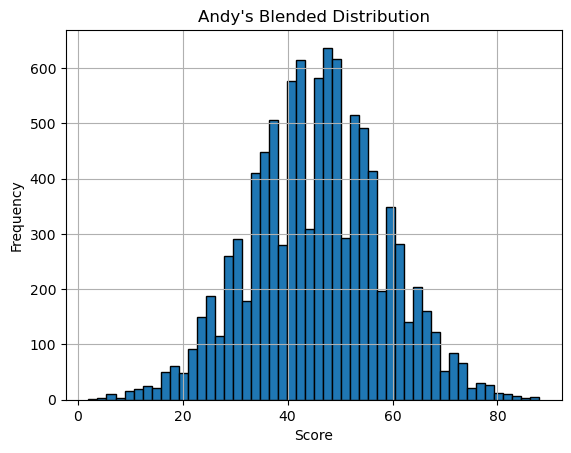

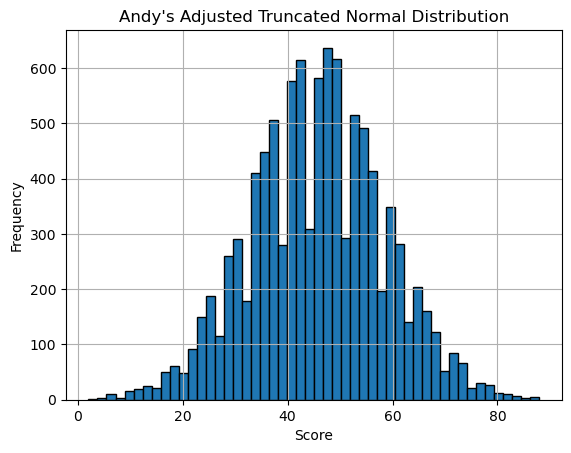

Finished sim 10
Finished sim 20
Finished sim 30
Finished sim 40
Finished sim 50
Finished sim 60
Finished sim 70
Finished sim 80
Finished sim 90
Finished sim 100
Finished sim 110
Finished sim 120
Finished sim 130
Finished sim 140
Finished sim 150
Finished sim 160
Finished sim 170
Finished sim 180
Finished sim 190
Finished sim 200
Finished sim 210
Finished sim 220
Finished sim 230
Finished sim 240
Finished sim 250
Finished sim 260
Finished sim 270
Finished sim 280
Finished sim 290
Finished sim 300
Finished sim 310
Finished sim 320
Finished sim 330
Finished sim 340
Finished sim 350
Finished sim 360
Finished sim 370
Finished sim 380
Finished sim 390
Finished sim 400
Finished sim 410
Finished sim 420
Finished sim 430
Finished sim 440
Finished sim 450
Finished sim 460
Finished sim 470
Finished sim 480
Finished sim 490
Finished sim 500
Finished sim 510
Finished sim 520
Finished sim 530
Finished sim 540
Finished sim 550
Finished sim 560
Finished sim 570
Finished sim 580
Finished sim 590
Finish

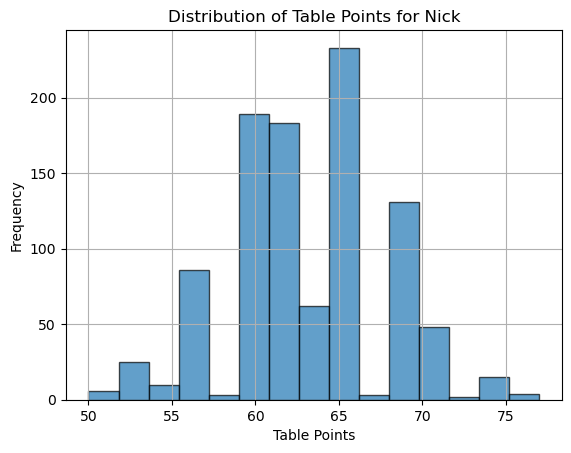

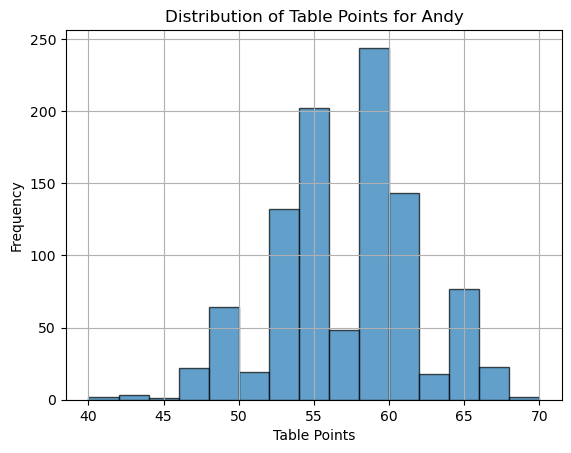

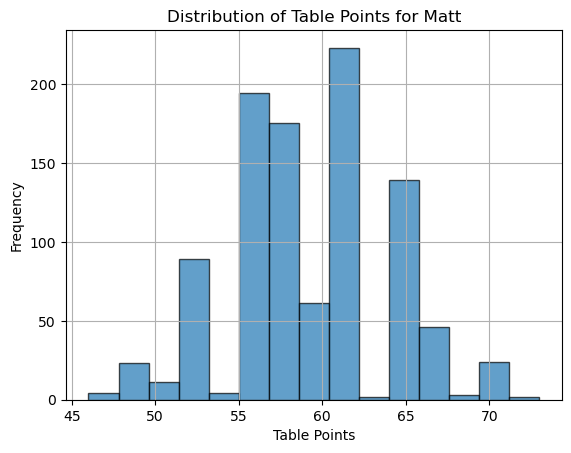

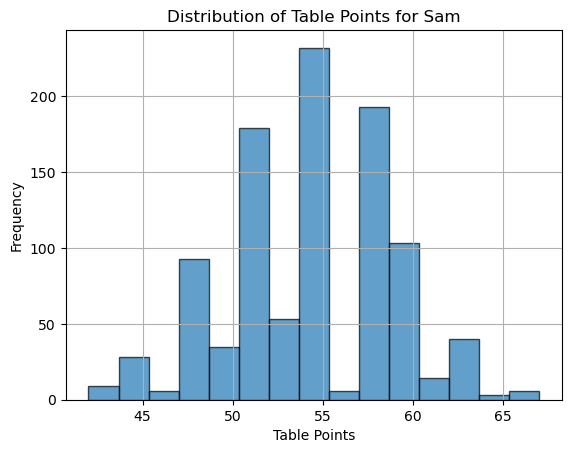

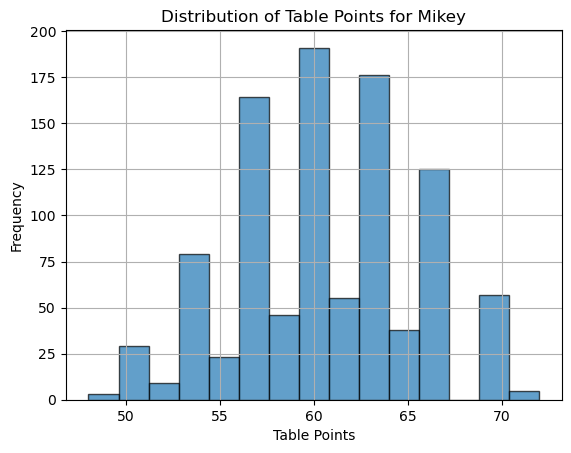

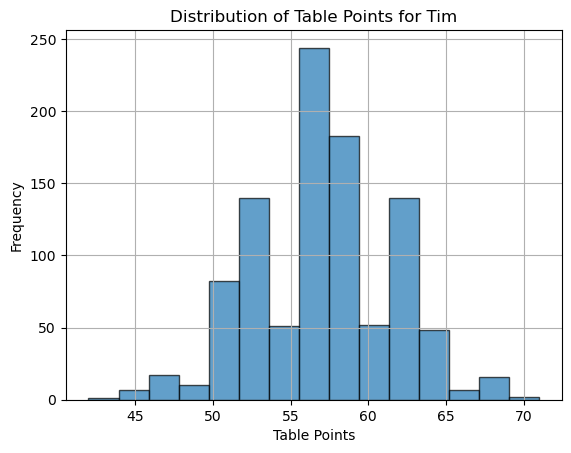

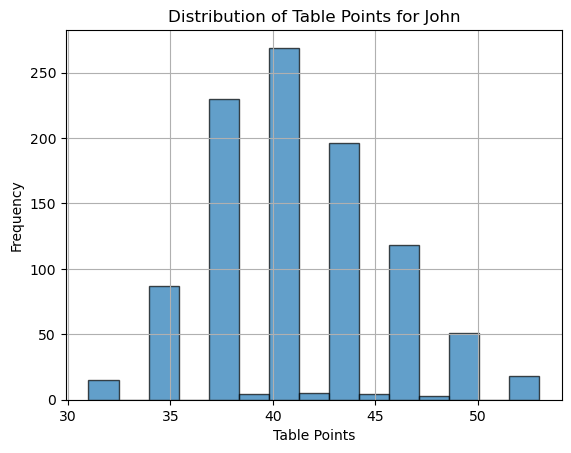

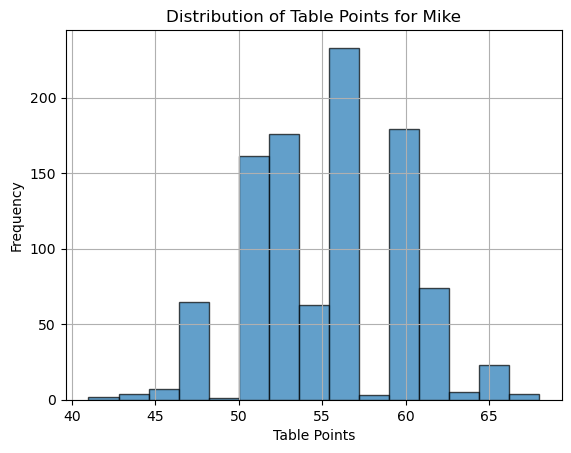

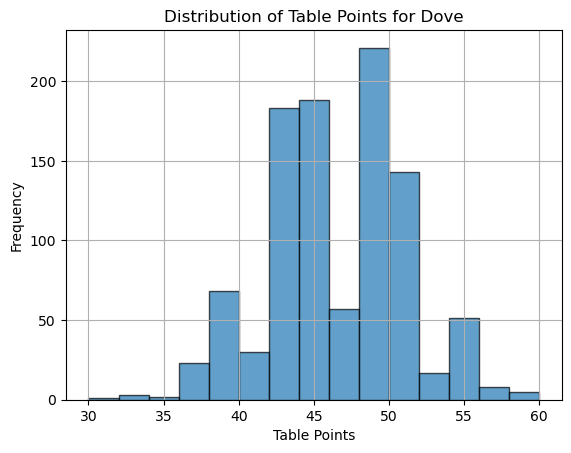

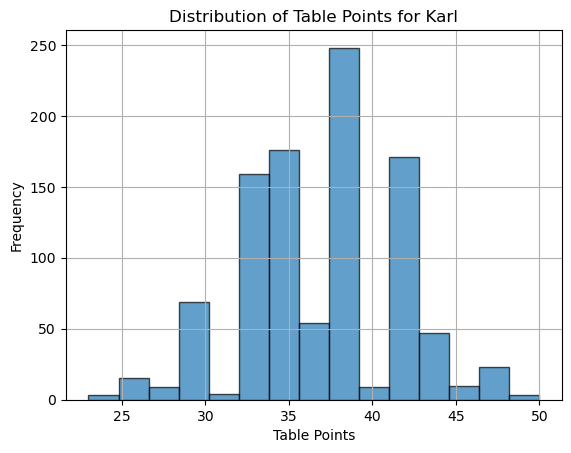

Granular Results Saved: granular_results.csv
Finishing Positions Saved: finishing_positions.csv
Top 4 Odds Saved: top_4_odds.csv


In [44]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm

# Compute global league mean and std from ALL player scores
all_scores = final_df['Player_Score']
league_mean = all_scores.mean()
league_std = all_scores.std()

# Decide on a weight w based on number of games played so far
# For example, if max_gameweek < 20, more regression to mean
max_gameweek = final_df['Gameweek'].max()
w = 0.5 if max_gameweek < 20 else 0.8  # Just an example heuristic

player_stats = final_df.groupby('Player')['Player_Score'].agg(['mean', 'std', 'count']).reset_index()
player_stats = player_stats.rename(columns={
    'mean': 'mean_score',
    'std': 'std_dev',
    'count': 'games_played'
})

score_distributions = {}
extension_factor = 0.5  # how much to extend beyond observed extremes

for _, row in player_stats.iterrows():
    player = row['Player']
    mean_p = row['mean_score']
    std_p = row['std_dev']
    count_p = row['games_played']

    # If player's std_dev is NaN or 0 (no variation so far), set a minimum std_dev
    if np.isnan(std_p) or std_p == 0:
        std_p = league_std  # or some small fraction of league_std if you'd prefer

    # Blend player stats with league stats
    player_mean_final = w * mean_p + (1 - w) * league_mean
    player_std_final = w * std_p + (1 - w) * league_std

    # Determine truncation bounds
    # Instead of using exact historical min/max, use something broader
    # For example, allow scores roughly from 0 to 100 always, since fantasy scores might vary widely
    # Or if you want min/max:
    low = max(0, player_mean_final - player_std_final * (3 + extension_factor))  # 3 std dev is quite large
    high = min(100, player_mean_final + player_std_final * (3 + extension_factor))

    # Ensure low < high
    if low >= high:
        # fallback: use league averages
        low = max(0, league_mean - 3*league_std)
        high = min(100, league_mean + 3*league_std)

    a = (low - player_mean_final) / player_std_final
    b = (high - player_mean_final) / player_std_final

    truncated_dist = truncnorm(a, b, loc=player_mean_final, scale=player_std_final)
    scores = truncated_dist.rvs(10000)

    # Round to nearest integer
    scores = np.rint(scores)
    # Clip final scores to [0, 100], just to be safe
    scores = np.clip(scores, 0, 100)

    score_distributions[player] = scores

# Optionally check a distribution
import matplotlib.pyplot as plt
player_to_check = list(score_distributions.keys())[0]
plt.hist(score_distributions[player_to_check], bins=50, edgecolor='black')
plt.title(f"{player_to_check}'s Blended Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Optional: Check distribution shape for a specific player
player_to_check = list(score_distributions.keys())[0]
plt.hist(score_distributions[player_to_check], bins=50, edgecolor='black')
plt.title(f"{player_to_check}'s Adjusted Truncated Normal Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


def simulate_season(final_df, fixtures, score_distributions, num_simulations):
    granular_results = []
    finished_gw = final_df['Gameweek'].max()

    # Calculate max possible points for each player
    known_points = final_df.groupby('Player')['Table Points'].sum()
    remaining_games = fixtures[fixtures['Gameweek'] > finished_gw]['Gameweek'].nunique()
    max_points_per_player = known_points + (remaining_games * 3)

    # Create a unique match key to avoid double counting
    fixtures['MatchKey'] = fixtures.apply(
        lambda x: (x['Gameweek'], tuple(sorted([x['Player'], x['Opponent']]))),
        axis=1
    )

    for sim in range(num_simulations):
        # Initialize simulation table with known results
        sim_table = final_df[['Player', 'Table Points', 'Player_Score']].groupby('Player', as_index=False).sum()
        sim_table['Player_Score'] = sim_table['Player_Score'].astype(float)


        # Filter remaining fixtures and remove duplicates by MatchKey
        remaining_fixtures = fixtures[fixtures['Gameweek'] > finished_gw].drop_duplicates(subset=['MatchKey'])

        for _, fixture in remaining_fixtures.iterrows():
            player, opponent = fixture['Player'], fixture['Opponent']
            player_score = np.random.choice(score_distributions[player])
            opponent_score = np.random.choice(score_distributions[opponent])

            # Update points based on result
            if player_score > opponent_score:
                sim_table.loc[sim_table['Player'] == player, 'Table Points'] += 3
            elif player_score < opponent_score:
                sim_table.loc[sim_table['Player'] == opponent, 'Table Points'] += 3
            else:
                sim_table.loc[sim_table['Player'] == player, 'Table Points'] += 1
                sim_table.loc[sim_table['Player'] == opponent, 'Table Points'] += 1

            # Update Player Scores
            sim_table.loc[sim_table['Player'] == player, 'Player_Score'] += player_score
            sim_table.loc[sim_table['Player'] == opponent, 'Player_Score'] += opponent_score

        # Check if any player exceeds max points during this simulation
        for _, row in sim_table.iterrows():
            if row['Table Points'] > max_points_per_player[row['Player']]:
                raise ValueError(f"Player {row['Player']} exceeds maximum possible points in simulation {sim}.")

        # Sort and rank players at the end of the simulation
        sim_table = sim_table.sort_values(by=['Table Points', 'Player_Score'], ascending=[False, False])
        sim_table['Rank'] = range(1, len(sim_table) + 1)
        sim_table['Simulation'] = sim

        granular_results.append(sim_table)

        # Print update every 10 simulations
        if (sim + 1) % 10 == 0:
            print(f"Finished sim {sim+1}")

    # Combine all results into a single dataframe
    granular_results = pd.concat(granular_results, ignore_index=True)

    # Calculate finishing position percentages
    finishing_positions = granular_results.groupby(['Player', 'Rank']).size().unstack(fill_value=0)
    finishing_positions = finishing_positions.div(finishing_positions.sum(axis=1), axis=0) * 100

    # Round to one decimal place
    finishing_positions = finishing_positions.round(1)

    # Sort by column '1' (and subsequently by '2', '3', etc. for ties), descending
    sort_cols = list(finishing_positions.columns)
    finishing_positions = finishing_positions.sort_values(by=sort_cols, ascending=False)

    
    # Calculate top 4 odds
    top_4_odds = granular_results[granular_results['Rank'] <= 4].groupby('Player')['Rank'].count()
    top_4_odds = (top_4_odds / num_simulations * 100).reset_index()
    top_4_odds.columns = ['Player', 'Top 4 %']

    # Convert probability to fractional and American odds
    def probability_to_odds(p):
        # Handle edge cases
        if p == 1.0:
            # Always top 4, fraction should be "1/∞", we can just say "1/999"
            frac_odds = "1/999"
            american = -10000  # very large negative number to indicate overwhelming favorite
            return frac_odds, american
        elif p == 0.0:
            # Never top 4, fraction should be "∞/1", we can just say "999/1"
            frac_odds = "999/1"
            american = 10000  # very large positive number to indicate no chance
            return frac_odds, american
    
        fraction = (1 - p) / p
        # Fractional odds
        if fraction >= 1:
            frac_odds = f"{int(round(fraction))}/1"
        else:
            inv = 1 / fraction
            frac_odds = f"1/{int(round(inv))}"
    
        # American odds
        if p > 0.5:
            american = -int(round(100 * p / (1 - p)))
        else:
            american = int(round(100 * (1 - p) / p))
    
        return frac_odds, american


    top_4_odds['Fractional Odds'] = ""
    top_4_odds['American Odds'] = 0

    for i, row in top_4_odds.iterrows():
        p = row['Top 4 %'] / 100.0
        frac, am = probability_to_odds(p)
        top_4_odds.at[i, 'Fractional Odds'] = frac
        top_4_odds.at[i, 'American Odds'] = am

    # Sort top_4_odds by 'Top 4 %' descending
    top_4_odds = top_4_odds.sort_values(by='Top 4 %', ascending=False)
    
    # NEW LINES: Add 'as of finished_gw' and update top_4_odds_history
    top_4_odds['as of finished_gw'] = finished_gw
    
    history_filename = "top_4_odds_history.csv"
    try:
        top_4_history = pd.read_csv(history_filename)
    except FileNotFoundError:
        top_4_history = pd.DataFrame()
    
    # Remove old entries for this finished_gw if any
    if not top_4_history.empty:
        top_4_history = top_4_history[top_4_history['as of finished_gw'] != finished_gw]
    
    top_4_history = pd.concat([top_4_history, top_4_odds], ignore_index=True)
    top_4_history = top_4_history.sort_values(by='as of finished_gw', ascending=False)
    top_4_history.to_csv(history_filename, index=False)
    
    # Create distribution charts for each player
    players = granular_results['Player'].unique()
    for player in players:
        player_points = granular_results.loc[granular_results['Player'] == player, 'Table Points']
    
        plt.figure()
        plt.hist(player_points, bins=15, edgecolor='black', alpha=0.7)
        plt.title(f"Distribution of Table Points for {player}")
        plt.xlabel("Table Points")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.savefig(f"{player}_table_points_distribution.png")
        plt.show()
        plt.close()
    
    return granular_results, finishing_positions, top_4_odds


# Run the simulation (adjust num_simulations as needed)
num_simulations = 1000
granular_results, finishing_positions, top_4_odds = simulate_season(final_df, fixtures, score_distributions, num_simulations)

# Save results
granular_results.to_csv("granular_results.csv", index=False)
finishing_positions.to_csv("finishing_positions.csv")
top_4_odds = top_4_odds.sort_values(by='Top 4 %', ascending=False)
top_4_odds.to_csv("top_4_odds.csv", index=False)
#store distros as a file for streamlit
pd.to_pickle(score_distributions, "score_distributions.pkl")

print("Granular Results Saved: granular_results.csv")
print("Finishing Positions Saved: finishing_positions.csv")
print("Top 4 Odds Saved: top_4_odds.csv")


In [23]:
#store distros as a file for streamlit
pd.to_pickle(score_distributions, "score_distributions.pkl")

# Print the first 20 scores possible for 'Andy'
print("Andy's scores:", score_distributions['Andy'][:20])


Andy's scores: [45. 37. 52. 38. 55. 54. 50. 67. 70. 66. 32. 36. 45. 22. 53. 51. 19. 56.
 35. 39.]


In [25]:
#show results
granular_results.head(30)

,Player,Table Points,Player_Score,Rank,Simulation
0,Nick,72,1653.0,1,0
1,Matt,64,1616.0,2,0
2,Mikey,63,1687.0,3,0
3,Andy,53,1661.0,4,0
4,Dove,52,1642.0,5,0
5,Sam,52,1546.0,6,0
6,Mike,51,1459.0,7,0
7,Tim,47,1543.0,8,0
8,John,37,1254.0,9,0
9,Karl,36,1541.0,10,0


In [27]:
finishing_positions 

Rank,1,2,3,4,5,6,7,8,9,10
Player,,,,,,,,,,
Nick,31.3,21.3,16.0,12.0,9.6,6.7,2.3,0.8,0.0,0.0
Mikey,24.4,22.9,16.3,14.6,9.4,6.7,3.4,1.9,0.4,0.0
Andy,15.0,16.5,20.3,15.8,13.5,9.7,6.7,2.1,0.4,0.0
Matt,14.7,16.1,18.3,14.8,15.4,10.1,7.6,2.2,0.8,0.0
Sam,7.0,10.4,13.3,14.6,16.7,17.2,13.5,5.9,1.3,0.1
Tim,5.5,7.9,10.3,16.4,16.5,17.4,15.7,8.4,1.9,0.0
Mike,1.7,4.5,4.3,9.0,12.6,19.9,26.7,17.4,3.7,0.2
Dove,0.4,0.4,1.2,2.6,5.5,9.8,17.9,38.2,19.4,4.6
John,0.0,0.0,0.0,0.2,0.8,2.2,5.3,18.1,47.2,26.2


In [29]:
top_4_odds

,Player,Top 4 %,Fractional Odds,American Odds,as of finished_gw
6,Nick,80.6,1/4,-415,25
5,Mikey,78.2,1/4,-359,25
0,Andy,67.6,1/2,-209,25
3,Matt,63.9,1/2,-177,25
7,Sam,45.3,1/1,121,25
8,Tim,40.1,1/1,149,25
4,Mike,19.5,4/1,413,25
1,Dove,4.6,21/1,2074,25
2,John,0.2,499/1,49900,25


In [93]:
top_4_history

NameError: name 'top_4_history' is not defined

In [65]:
# Function to map the last character to the player's position
def map_position(name):
    if name.endswith('F'):
        return 'FWD'
    elif name.endswith('M'):
        return 'MID'
    elif name.endswith('D'):
        return 'DEF'
    elif name.endswith('G'):
        return 'GK'
    else:
        return 'Unknown'  # Handle unexpected cases

# Apply the function to create the 'Position' column
players_df['Position'] = players_df['Name'].apply(map_position)

# Display the updated DataFrame
(players_df)


NameError: name 'players_df' is not defined

In [179]:
# Function to extract the team name
def extract_team_name(name):
    # Split by capital letters and numbers, and remove the player's name and the position at the end
    parts = re.findall(r'[A-Z][a-z]*|[A-Z]+[a-z]*|[A-Z]+|\d+', name)
    
    # Combine parts that make up the team name (everything after the first element and before the last)
    team_name = ' '.join(parts[1:-1])
    return team_name

# Apply the function to create the 'TeamName' column
players_df['TeamName'] = players_df['Name'].apply(extract_team_name)

# Display the updated DataFrame
(players_df)


,Name,Vs,Rating,Pts,PPG,F5,MP,G,A,xG,xA,GC,CS,Owner,Trade,Position,TeamName
0,Welbeck,ARS (A),57,20,10,20,152,2,1,1.35,0.05,1,1,John,Trade,Unknown,
1,Mazraoui,LIV (H),52,14,7,14,142,0,1,0,0.02,1,1,Waivers,Trade,Unknown,
2,M.Salah,MUN (A),89,14,14,14,90,1,1,0.7,0.15,0,1,Sam,Trade,Unknown,
3,Havertz,BHA (H),68,13,13,13,90,1,1,0.45,0.04,0,1,Nick,Trade,Unknown,
4,Mitoma,ARS (A),61,13,6.5,13,150,1,1,0.97,0.61,1,1,Mikey,Trade,Unknown,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Harris,IPS (A),0,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
619,Mbabu,IPS (A),50,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
620,Marcal,AVL (H),52,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
621,Schär,TOT (H),57,-2,-2,-2,27,0,0,0.04,0,0,0,Nick,Trade,Unknown,


In [181]:


# Count occurrences of each TeamName
team_counts = players_df['TeamName'].value_counts()

# Function to modify TeamName if occurrences are less than 10
def adjust_team_name(team_name):
    if team_counts[team_name] < 10:
        return ' '.join(team_name.split(' ')[1:])
    return team_name

# Apply the function to adjust the TeamName column
players_df['TeamName'] = players_df['TeamName'].apply(adjust_team_name)

# Display the updated DataFrame
(players_df)


,Name,Vs,Rating,Pts,PPG,F5,MP,G,A,xG,xA,GC,CS,Owner,Trade,Position,TeamName
0,Welbeck,ARS (A),57,20,10,20,152,2,1,1.35,0.05,1,1,John,Trade,Unknown,
1,Mazraoui,LIV (H),52,14,7,14,142,0,1,0,0.02,1,1,Waivers,Trade,Unknown,
2,M.Salah,MUN (A),89,14,14,14,90,1,1,0.7,0.15,0,1,Sam,Trade,Unknown,
3,Havertz,BHA (H),68,13,13,13,90,1,1,0.45,0.04,0,1,Nick,Trade,Unknown,
4,Mitoma,ARS (A),61,13,6.5,13,150,1,1,0.97,0.61,1,1,Mikey,Trade,Unknown,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Harris,IPS (A),0,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
619,Mbabu,IPS (A),50,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
620,Marcal,AVL (H),52,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
621,Schär,TOT (H),57,-2,-2,-2,27,0,0,0.04,0,0,0,Nick,Trade,Unknown,


In [183]:
# Function to trim the Name column to exclude the TeamName and position
def trim_name(name, team_name):
    # Find the index where the team name starts in the Name column
    team_start_idx = name.find(team_name)
    if team_start_idx != -1:
        # Return the substring of Name up to the team name
        return name[:team_start_idx].strip()
    return name

# Apply the function to trim the Name column
players_df['Name'] = players_df.apply(lambda row: trim_name(row['Name'], row['TeamName']), axis=1)

# Display the updated DataFrame
(players_df)


,Name,Vs,Rating,Pts,PPG,F5,MP,G,A,xG,xA,GC,CS,Owner,Trade,Position,TeamName
0,,ARS (A),57,20,10,20,152,2,1,1.35,0.05,1,1,John,Trade,Unknown,
1,,LIV (H),52,14,7,14,142,0,1,0,0.02,1,1,Waivers,Trade,Unknown,
2,,MUN (A),89,14,14,14,90,1,1,0.7,0.15,0,1,Sam,Trade,Unknown,
3,,BHA (H),68,13,13,13,90,1,1,0.45,0.04,0,1,Nick,Trade,Unknown,
4,,ARS (A),61,13,6.5,13,150,1,1,0.97,0.61,1,1,Mikey,Trade,Unknown,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,,IPS (A),0,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
619,,IPS (A),50,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
620,,AVL (H),52,0,0,0,0,0,0,0,0,0,0,Waivers,Trade,Unknown,
621,,TOT (H),57,-2,-2,-2,27,0,0,0.04,0,0,0,Nick,Trade,Unknown,


In [155]:
players_df.to_csv('/Users/andrewuttley/Desktop/FPL202425/waiverplayers2024.csv')